<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/7.%20%EA%B8%8D%EC%A0%95%2C%EB%B6%80%EC%A0%95%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EC%84%9D%20%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [𝑁𝐴𝑉𝐸𝑅 𝑠𝑒𝑛𝑡𝑖𝑚𝑒𝑛𝑡 𝑚𝑜𝑣𝑖𝑒 𝑐𝑜𝑟𝑝𝑢𝑠𝑣1.0]을 이용한 긍정 부정 감성 분석

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

# 훈련 데이터로 15 만 개 , 테스트 데이터로 5 만개로 총 20 만 개의 리뷰가 있습니다 . 리뷰 중 10 만개는 별점이 1~4 로 부정적인 리뷰, 나머지 10 만개는 9~10 으로 긍정적인 리뷰

4898816/4893335 [==============================] - 0s 0us/step


In [ ]:
# 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다 encoding 형식으로 utf 8 을 지정해야합니다
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf 8')
test_text = open(path_to_test_file, 'rb').read().decode( encoding='utf 8')

# 텍스트가 총 몇 자인지 확인합니다
print('Length of train text: {} characters'.format(len(train_text)))
print('Length of test text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다
print(train_text[:300])

Length of train text: 6937271 characters
Length of test text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [ ]:
# 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [ ]:
# rain data의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]


# train 데이터의 처음 5개로 잘 되었나 확인
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


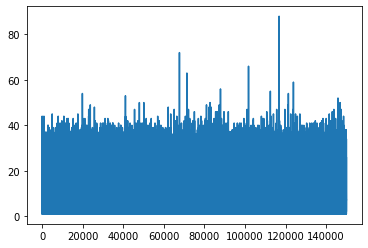

142587


In [ ]:
# 네트워크에 입력하기 위한 데이터의 크기는 동일해야하므로
# 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

- 대부분 40 단어 이하로 구성 되어있음을 확인

In [ ]:
# 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][: 25]) # 단어 길이 최대 다섯 글자로 줄이기
sentences = sentences_new
for i in range(5) :
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [ ]:
#Tokenizer 와 pad_sequences 를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words= 20000) 
# Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
# num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다
tokenizer.fit_on_texts(sentences)                 # Tokenizer 에 데이터 실제로 입력
train_X = tokenizer.texts_to_sequences(sentences) # 문장을 입력받아 숫자를 반환합니다
train_X = pad_sequences(train_X, padding= 'post') # 입력된 데이터에 패딩을 더합니다 .
 
print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [ ]:
# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([tf.keras.layers.Embedding(20000, 300, input_length= 25),
                             tf.keras.layers.LSTM(units=50),
                             tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

  ## 네트워크의 loss 는 'sparse_categorical_crossentropy 를 사용. 
  ## 여러 개의 정답 중 하나를 맞추는 분류 문제일 때 categorical_crossentropy 를 사용하고 , sparse 는 정답인 Y 가 희소 행렬일 때 사용

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(train_X.shape)
print(train_Y.shape)

(150000, 25)
(150000, 1)


In [ ]:
# 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs= 5, batch_size= 128, validation_split= 0.2)
  ## 데이터가 많기 때문에 한번에 학습하는 데이터의 양인 batch_size 를 128 로 설정했고 , 5 에폭만 학습을

Epoch 1/5
938/938 [==============================] - 117s 123ms/step - loss: 0.5157 - accuracy: 0.7103 - val_loss: 0.3871 - val_accuracy: 0.8125
Epoch 2/5
938/938 [==============================] - 113s 120ms/step - loss: 0.3166 - accuracy: 0.8522 - val_loss: 0.3913 - val_accuracy: 0.8216
Epoch 3/5
938/938 [==============================] - 114s 121ms/step - loss: 0.2616 - accuracy: 0.8747 - val_loss: 0.4179 - val_accuracy: 0.8132
Epoch 4/5
938/938 [==============================] - 114s 122ms/step - loss: 0.2126 - accuracy: 0.8968 - val_loss: 0.4945 - val_accuracy: 0.8103
Epoch 5/5
938/938 [==============================] - 113s 121ms/step - loss: 0.1844 - accuracy: 0.9084 - val_loss: 0.5417 - val_accuracy: 0.8100


<function matplotlib.pyplot.show>

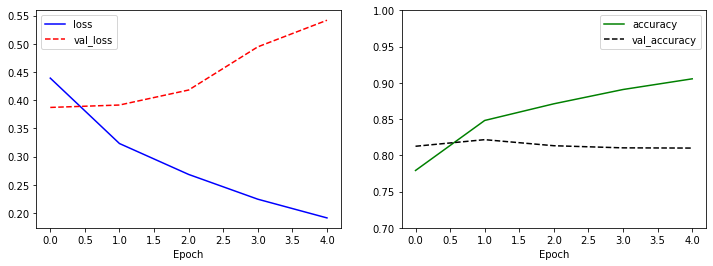

In [ ]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show

In [ ]:
# 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences) #훈련데이터와는 다르게 테스트 데이터에서는 어떤 단어가 나타날지 모르기 때문에 Tokenizer 는 훈련 데이터로만 학습 시켜야 합니다 .
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose= 0)

[0.5600625276565552, 0.8009799718856812]

# E.O.D